In [1]:
import cv2

In [3]:
bgr_image=cv2.imread('mountain.jpg')
"""this bgr_image is a numpy array"""
print(bgr_image.shape)

(706, 1060, 3)


In [4]:
# convert to grayscale
gray_image=cv2.cvtColor(bgr_image, cv2.COLOR_BGR2GRAY)
cv2.imwrite('mountain_gray.jpg', gray_image)

True

In [5]:
# convert to hsv from bgr
# humans are not familiar with hsv and lab
hsv_image=cv2.cvtColor(bgr_image, cv2.COLOR_BGR2HSV)
cv2.imwrite('mountain_hsv.jpg', hsv_image)

True

In [6]:
# convert to lab
lab_image=cv2.cvtColor(bgr_image, cv2.COLOR_BGR2LAB)
cv2.imwrite('mountain_lab.jpg', lab_image)

True

In [7]:
# what is relation bw bgr and rgb
# convert to rgb
rgb_image=cv2.cvtColor(bgr_image, cv2.COLOR_BGR2RGB)
cv2.imwrite('mountain_rgb.jpg', rgb_image)

True

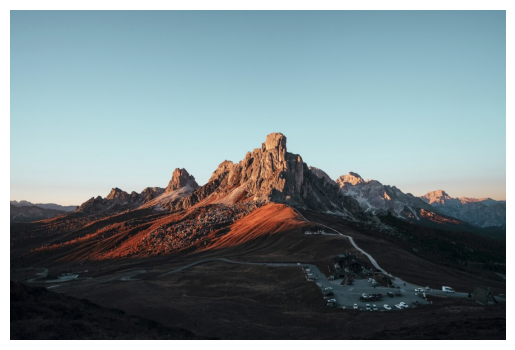

In [10]:
from matplotlib import pyplot as plt
plt.imshow(rgb_image)  # Matplotlib expects RGB format
plt.axis('off')  # Hide axes
plt.show()

In [8]:
cv2.imwrite('mountain_bgr.jpg', bgr_image)

True

It is said that when an image to provided to openCV, it reads as BGR image. But after applying some operations, when we convert it to RGB image, it doesnt look like the original image. Lets say we do not apply any effects at all. Just read the image and convert it back to RBG image. Now it should look like the original image. But it does not. Why is this happening?

##### The original image is an RGB image. OpenCV converts the image to BGR. Now if I convert it back to RGB image, it is not looking as the original image. Why is this happening?

# Understanding OpenCV's BGR to RGB Conversion Issue

## Why Does the Image Look Different After Conversion?

OpenCV reads images in **BGR format** by default, whereas most other libraries (such as Matplotlib) expect images in **RGB format**. When you convert an image from BGR to RGB using `cv2.cvtColor()`, the color channels are swapped. However, if you save the converted RGB image using OpenCV's `cv2.imwrite()`, OpenCV interprets the RGB data as if it were BGR again, leading to incorrect colors.

## Step-by-Step Explanation with Code

### **1. Reading an Image in OpenCV**
```python
import cv2
import matplotlib.pyplot as plt

# Read image in OpenCV (loads in BGR format)
bgr_image = cv2.imread('mountain.jpg')
```
At this point, `bgr_image` contains pixel values in the order **Blue-Green-Red (BGR)**.

---
### **2. Converting to RGB Format**
```python
rgb_image = cv2.cvtColor(bgr_image, cv2.COLOR_BGR2RGB)
```
Now, `rgb_image` contains pixel values in the order **Red-Green-Blue (RGB)**, which is the expected format for libraries like Matplotlib.

---
### **3. Displaying the Image Using Matplotlib**
```python
plt.imshow(rgb_image)  # Matplotlib expects RGB format
plt.axis('off')  # Hide axes
plt.show()
```
Matplotlib displays the image correctly because it expects an RGB image.

---
### **4. Saving the Converted Image with OpenCV**
```python
cv2.imwrite('mountain_rgb.jpg', rgb_image)
```
This is where the issue occurs! OpenCV assumes the input to `cv2.imwrite()` is in **BGR format**, but `rgb_image` is actually in **RGB format**. As a result, the colors get swapped incorrectly when the image is saved.

---
## **Fix: Convert Back to BGR Before Saving**
To ensure that the saved image looks correct, convert the RGB image **back to BGR** before saving:
```python
cv2.imwrite('mountain_corrected.jpg', cv2.cvtColor(rgb_image, cv2.COLOR_RGB2BGR))
```
Now, OpenCV writes the correct color channels, and the saved image appears as expected.

---
## **Summary**
| Step | Image Format |
|------|-------------|
| Read image with OpenCV | BGR |
| Convert to RGB | RGB |
| Display with Matplotlib | Correct (RGB expected) |
| Save without converting back | Incorrect (Interpreted as BGR) |
| Save after converting back | Correct (BGR format restored) |

By following this approach, you can ensure that your images are displayed and saved correctly when working with OpenCV and Matplotlib.

---
### **Final Takeaway**
- OpenCV reads images in **BGR format** by default.
- If you convert an image to **RGB**, do not save it directly with `cv2.imwrite()`, as OpenCV expects BGR input.
- Convert the RGB image **back to BGR** before saving using `cv2.cvtColor(img, cv2.COLOR_RGB2BGR)`.



